In [ ]:
import scipy.io
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import load_model
import cv2
from glob import glob
import os

In [ ]:
mat = scipy.io.loadmat('drive/My Drive/Tibame_AIoT_Project/Datasets/資料集_IMDB-Wiki/wiki_crop/wiki.mat')
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]
instances = mat['wiki'][0][0][0].shape[1]
df = pd.DataFrame(index = range(0,instances), columns = columns)
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
         array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
         array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
         array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
         array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
         array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
       dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
         array(['Dettmar Cramer'], dtype='<U14'),
         array(['Marc Okrand'], dtype='<U11'), ...,
         array(['Michael Wiesinger'], dtype='<U17'),
         array(['Johann Grugger

In [ ]:
instances = mat['wiki'][0][0][0].shape[1]
 
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]
 
import pandas as pd
df = pd.DataFrame(index = range(0,instances), columns = columns)
 
for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]
for j in range(len(current_array)):
    df[columns[j]] = pd.DataFrame(current_array[j][0])
df

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN
...,...,...,...,...,...,...,...,...
62323,707582,1963,[49/9996949_1937-04-17_1963.jpg],1.0,[Guus Haak],"[[128.92773553879837, 128.92773553879837, 320....",4.029268,NaN
62324,711338,1970,[32/9997032_1947-07-30_1970.jpg],1.0,[Nico Rijnders],"[[1, 1, 285, 440]]",-inf,NaN
62325,720620,2013,[09/9998109_1972-12-27_2013.jpg],1.0,[Michael Wiesinger],"[[169.88839785556354, 74.31669471981023, 235.2...",3.494303,NaN
62326,723893,2011,[00/9999400_1981-12-13_2011.jpg],1.0,[Johann Grugger],"[[1, 1, 1, 1]]",-inf,NaN


In [ ]:
for i in range(len(df['full_path'])):
    df['full_path'][i] = df['full_path'][i][0]
df    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,17/10000217_1981-05-05_2009.jpg,1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,48/10000548_1925-04-04_1964.jpg,1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,12/100012_1948-07-03_2008.jpg,1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,65/10001965_1930-05-23_1961.jpg,1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,16/10002116_1971-05-31_2012.jpg,0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN
...,...,...,...,...,...,...,...,...
62323,707582,1963,49/9996949_1937-04-17_1963.jpg,1.0,[Guus Haak],"[[128.92773553879837, 128.92773553879837, 320....",4.029268,NaN
62324,711338,1970,32/9997032_1947-07-30_1970.jpg,1.0,[Nico Rijnders],"[[1, 1, 285, 440]]",-inf,NaN
62325,720620,2013,09/9998109_1972-12-27_2013.jpg,1.0,[Michael Wiesinger],"[[169.88839785556354, 74.31669471981023, 235.2...",3.494303,NaN
62326,723893,2011,00/9999400_1981-12-13_2011.jpg,1.0,[Johann Grugger],"[[1, 1, 1, 1]]",-inf,NaN


In [ ]:
from datetime import datetime, timedelta
def datenum_to_datetime(datenum):
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    exact_date = datetime.fromordinal(int(datenum)) \
    + timedelta(days=int(days)) + timedelta(hours=int(hours)) \
    + timedelta(minutes=int(minutes)) + timedelta(seconds=round(seconds)) \
    - timedelta(days=366)
    
    return exact_date.year
 
df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)
df['age'] = df['photo_taken'] - df['date_of_birth']
df

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth,age
0,723671,2009,17/10000217_1981-05-05_2009.jpg,1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,1981,28
1,703186,1964,48/10000548_1925-04-04_1964.jpg,1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,1925,39
2,711677,2008,12/100012_1948-07-03_2008.jpg,1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,1948,60
3,705061,1961,65/10001965_1930-05-23_1961.jpg,1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,1930,31
4,720044,2012,16/10002116_1971-05-31_2012.jpg,0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,1971,41
...,...,...,...,...,...,...,...,...,...,...
62323,707582,1963,49/9996949_1937-04-17_1963.jpg,1.0,[Guus Haak],"[[128.92773553879837, 128.92773553879837, 320....",4.029268,NaN,1937,26
62324,711338,1970,32/9997032_1947-07-30_1970.jpg,1.0,[Nico Rijnders],"[[1, 1, 285, 440]]",-inf,NaN,1947,23
62325,720620,2013,09/9998109_1972-12-27_2013.jpg,1.0,[Michael Wiesinger],"[[169.88839785556354, 74.31669471981023, 235.2...",3.494303,NaN,1972,41
62326,723893,2011,00/9999400_1981-12-13_2011.jpg,1.0,[Johann Grugger],"[[1, 1, 1, 1]]",-inf,NaN,1981,30


In [ ]:
#remove pictures does not include face
df = df[df['face_score'] != -np.inf]
 
#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]
 
#check threshold
df = df[df['face_score'] >= 3]
 
#some records do not have a gender information
df = df[~df['gender'].isna()]
 
df = df.drop(columns = ['dob', 'photo_taken', 'name','face_score','second_face_score','date_of_birth','face_location'])
df

,full_path,gender,age
0,17/10000217_1981-05-05_2009.jpg,1.0,28
2,12/100012_1948-07-03_2008.jpg,1.0,60
4,16/10002116_1971-05-31_2012.jpg,0.0,41
5,02/10002702_1960-11-09_2012.jpg,0.0,52
6,41/10003541_1937-09-27_1971.jpg,1.0,34
...,...,...,...
62321,38/9996938_1937-02-15_1968.jpg,1.0,31
62322,46/9996946_1943-11-01_1968.jpg,1.0,25
62323,49/9996949_1937-04-17_1963.jpg,1.0,26
62325,09/9998109_1972-12-27_2013.jpg,1.0,41


In [ ]:
# gender = ['female', 'male']
# df['gender'] = df['gender'].astype('int')
# df['gender'] = df['gender'].apply(lambda x: gender[x])
# df

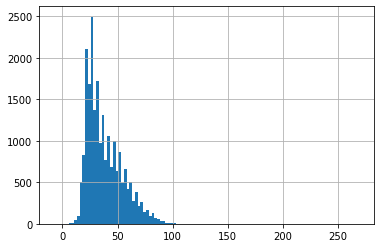

In [ ]:
histogram_age = df['age'].hist(bins=df['age'].nunique())

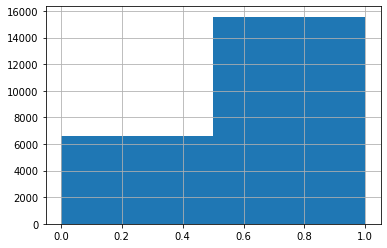

In [ ]:
histogram_gender = df['gender'].hist(bins=df['gender'].nunique())

In [ ]:
df.to_csv('drive/My Drive/Tibame_AIoT_Project/Datasets/資料集_IMDB-Wiki/wiki_crop/wiki_mat.csv', 
          encoding="utf-8", index=False)